# MTCNN (Multi-task cascaded convolutional networks)
Original paper [here](https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf).<br>
___
## Overview
MTCNN contains three cascaded ConvNets: P-Net, R-Net and O-Net.<br>
**Proposal Network (P-Net)**: obtain the candidate windows and their bounding box regression vectors. These regression vectors can be applied to calibrate the candidates. Highly overlapped candidates are merged via non-maximum suppression (NMS).<br>
> *Non-maximum suppression*: For an object, we have multiple boxes (each with a probability $p_c$). 
  1. We discard all boxes with $p_c \leq 0.6$. 
  2. In the remaining boxes, we pick the box with the largest $p_c$. Output that as a prediction. 
  3. We also discard any remaining box with IoU $\geq$ 0.5 with the box output in the previous step
>

Why not only keep the box with the largest $p_c$ and delete all others? Because there may be more than one face in a small region.

**Refine Network (R-Net)**: all candidates are fed into the R-Net which rejects a lot of false candidates. Further bounding box calibration and NMS candidate merge.<br> 
**Output Network (O-Net)**: similar to P-Net but it describes the face in more details. Output five facial landmarks' positions (eyes, nose and mouth) <br>
![Fig1](./JupyterImageSupport/MTCNN_paper_img1.png)![Fig2](./JupyterImageSupport/MTCNN_paper_img2.png)
MTCNN is suitable for multi-scale detection with different template sizes (
pyramid structure).<br>
*Remark*: For some unknown reasons "conda install -c conda-forge opencv" does not work for me. I use "pip install opencv-contrib-python" instead.

Install mtcnn package: inside anaconda environment type 'pip install mtcnn'. [SourceCode](https://github.com/ipazc/mtcnn)

In [1]:
from mtcnn.mtcnn import MTCNN
import cv2
img = cv2.imread("./JupyterImageSupport/ivan.jpg")
detector = MTCNN()
print(detector.detect_faces(img))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
[{'box': [277, 90, 48, 63], 'confidence': 0.9985198378562927, 'keypoints': {'left_eye': (291, 117), 'right_eye': (314, 114), 'nose': (303, 131), 'mouth_left': (296, 143), 'mouth_right': (313, 141)}}]


[{'box': [277, 90, 48, 63], 'confidence': 0.9985198378562927, 'keypoints': {'left_eye': (291, 117), 'right_eye': (314, 114), 'nose': (303, 131), 'mouth_left': (296, 143), 'mouth_right': (313, 141)}}]


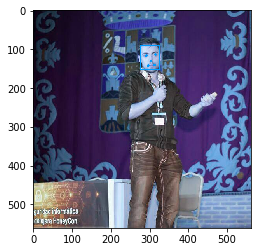

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

detector = MTCNN()

image = cv2.imread("./JupyterImageSupport/ivan.jpg")
result = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

print(result)
cv2.imwrite("./JupyterImageSupport/ivan_drawn.jpg", image)
plt.imshow(image)

#cv2.imshow('image',image)
